In [26]:
import xml.etree.ElementTree as ET
import pandas as pd
from setuptools.command.rotate import rotate


def get_items(response):
    # 응답 데이터를 텍스트로 변환
    xml_string = response.text  # 또는 response.content.decode('utf-8')
    
    root = ET.fromstring(xml_string)
    item_list = []
    
    # 모든 row 엘리먼트 찾기
    rows = root.findall('row')
    
    # 각 row 엘리먼트에서 데이터 추출
    for row in rows:
        elements = row.findall('*')
        data = {}
        for element in elements:
            tag = element.tag.strip()
            text = element.text.strip() if element.text else None
            data[tag] = text
        item_list.append(data)
    
    return item_list

# items_list = get_items(res)
# items = pd.DataFrame(items_list)
# items.head()

In [27]:
import requests
import datetime
import certifi
import ssl

def get_data(statbl_id, datacycle_cd, cls_id):
    url = "https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?"
    service_key = "37f7a534514349d48f2cf77dc2691da3"
    

    call_code = "Key=" + service_key + "&" +\
        "pIndex=1&pSize=1000&" +\
        "STATBL_ID=" + statbl_id + "&" +\
        "DTACYCLE_CD=" + datacycle_cd +\
        "&START_WRTTIME=2022&END_WRTTIME=2025" +"&" +\
        "CLS_ID=" + cls_id
    
    print(url+call_code)
    res = requests.get(url + call_code, verify=certifi.where())
    return res

In [28]:
STATBL_ID = "A_2024_00072"
cls_id_list = ["530088", "530089", "530090"]
#cls_id_list = ["500009"]
tx_list = []
for cls_id in cls_id_list:
    res = get_data(STATBL_ID, "MM", cls_id)
    tx_list += get_items(res)
    
len(tx_list)
apt_indi = pd.DataFrame(tx_list)
apt_indi

https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00072&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530088
https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00072&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530089
https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00072&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530090


,STATBL_ID,DTACYCLE_CD,WRTTIME_IDTFR_ID,GRP_ID,GRP_NM,CLS_ID,CLS_NM,ITM_ID,ITM_NM,DTA_VAL,UI_NM,GRP_FULLNM,CLS_FULLNM,ITM_FULLNM,WRTTIME_DESC
0,A_2024_00072,MM,202201,None,None,530088,덕양구,100001,매매가격 대비 전세가격,68.7,%,None,경기>경의권>고양시>덕양구,매매가격 대비 전세가격,2022년 1월
1,A_2024_00072,MM,202202,None,None,530088,덕양구,100001,매매가격 대비 전세가격,68.7,%,None,경기>경의권>고양시>덕양구,매매가격 대비 전세가격,2022년 2월
2,A_2024_00072,MM,202203,None,None,530088,덕양구,100001,매매가격 대비 전세가격,68.6,%,None,경기>경의권>고양시>덕양구,매매가격 대비 전세가격,2022년 3월
3,A_2024_00072,MM,202204,None,None,530088,덕양구,100001,매매가격 대비 전세가격,68.6,%,None,경기>경의권>고양시>덕양구,매매가격 대비 전세가격,2022년 4월
4,A_2024_00072,MM,202205,None,None,530088,덕양구,100001,매매가격 대비 전세가격,68.6,%,None,경기>경의권>고양시>덕양구,매매가격 대비 전세가격,2022년 5월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,A_2024_00072,MM,202403,None,None,530090,일산서구,100001,매매가격 대비 전세가격,67.6,%,None,경기>경의권>고양시>일산서구,매매가격 대비 전세가격,2024년 3월
89,A_2024_00072,MM,202404,None,None,530090,일산서구,100001,매매가격 대비 전세가격,68,%,None,경기>경의권>고양시>일산서구,매매가격 대비 전세가격,2024년 4월
90,A_2024_00072,MM,202405,None,None,530090,일산서구,100001,매매가격 대비 전세가격,68.3,%,None,경기>경의권>고양시>일산서구,매매가격 대비 전세가격,2024년 5월
91,A_2024_00072,MM,202406,None,None,530090,일산서구,100001,매매가격 대비 전세가격,68.8,%,None,경기>경의권>고양시>일산서구,매매가격 대비 전세가격,2024년 6월


In [29]:
goyang_apt_tx = apt_indi.drop(['DTACYCLE_CD', 'STATBL_ID','GRP_ID','GRP_NM','CLS_ID','ITM_ID','UI_NM','GRP_FULLNM', 'CLS_FULLNM','ITM_FULLNM'], axis=1)
goyang_apt_tx.isnull().sum()

WRTTIME_IDTFR_ID    0
CLS_NM              0
ITM_NM              0
DTA_VAL             0
WRTTIME_DESC        0
dtype: int64

In [30]:
# 수치형식 변환
goyang_apt_tx['WRTTIME_IDTFR_ID'] = goyang_apt_tx['WRTTIME_IDTFR_ID'].astype(int)
goyang_apt_tx['DTA_VAL'] = goyang_apt_tx['DTA_VAL'].astype(float)

In [31]:
goyang_apt_tx

,WRTTIME_IDTFR_ID,CLS_NM,ITM_NM,DTA_VAL,WRTTIME_DESC
0,202201,덕양구,매매가격 대비 전세가격,68.70000,2022년 1월
1,202202,덕양구,매매가격 대비 전세가격,68.70000,2022년 2월
2,202203,덕양구,매매가격 대비 전세가격,68.60000,2022년 3월
3,202204,덕양구,매매가격 대비 전세가격,68.60000,2022년 4월
4,202205,덕양구,매매가격 대비 전세가격,68.60000,2022년 5월
...,...,...,...,...,...
88,202403,일산서구,매매가격 대비 전세가격,67.60000,2024년 3월
89,202404,일산서구,매매가격 대비 전세가격,68.00000,2024년 4월
90,202405,일산서구,매매가격 대비 전세가격,68.30000,2024년 5월
91,202406,일산서구,매매가격 대비 전세가격,68.80000,2024년 6월


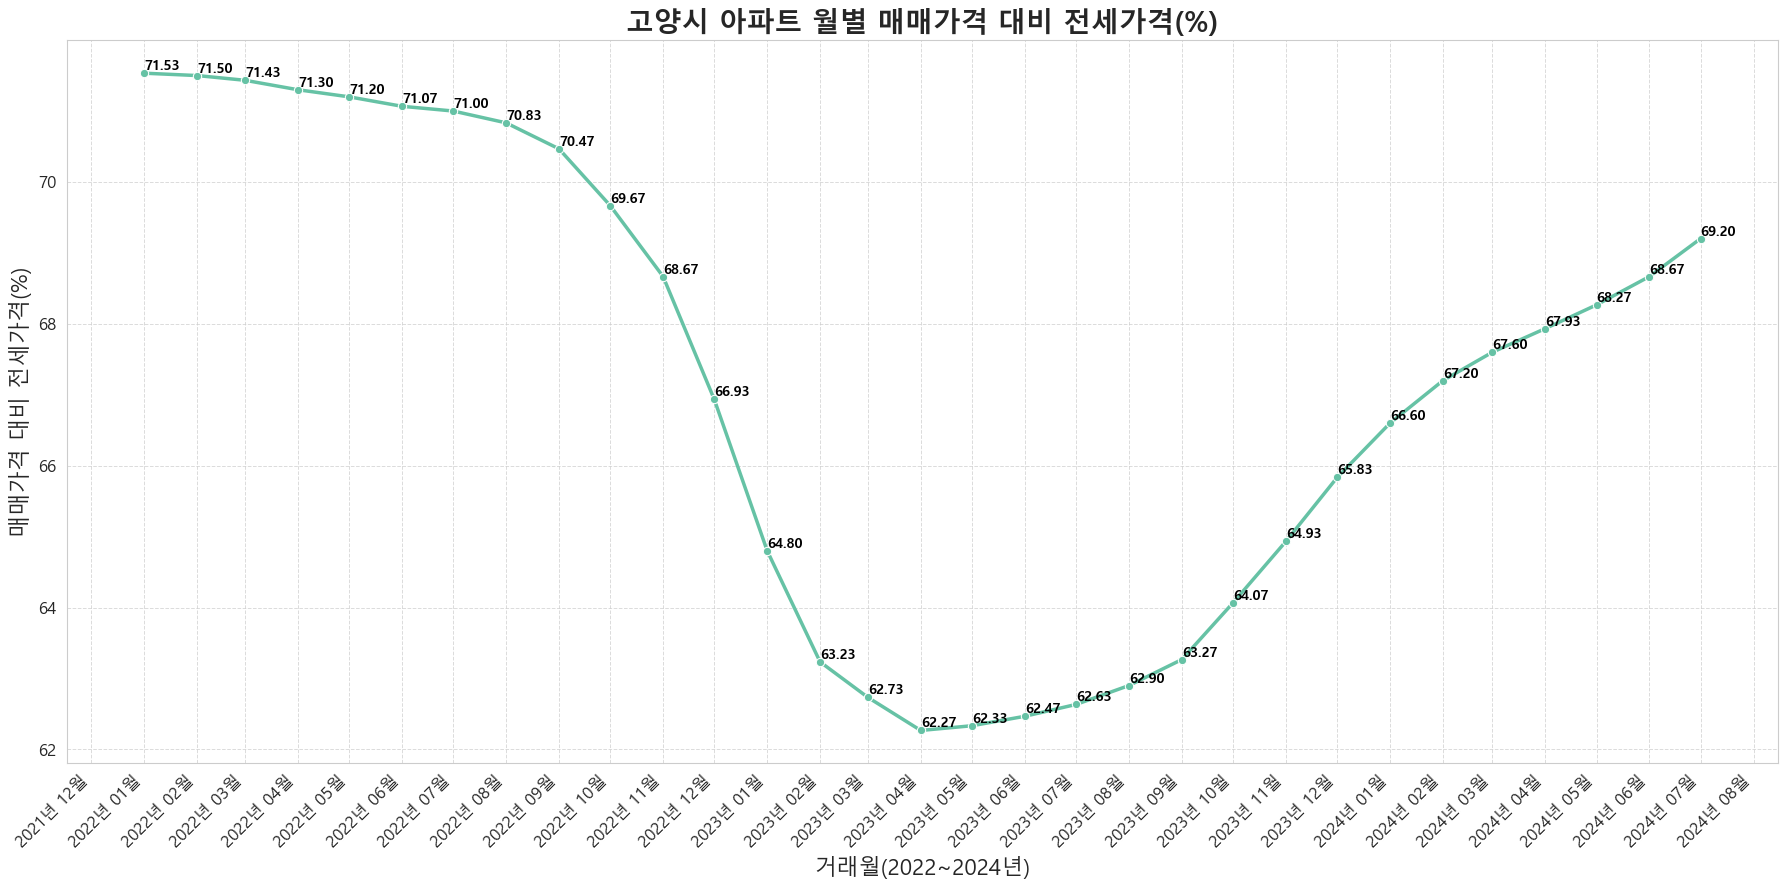

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_indi = goyang_apt_tx.copy()
goyang_monthly_indi['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_indi['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_indi = goyang_monthly_indi.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi, x='WRTTIME_IDTFR_ID', y='DTA_VAL', marker='o', linewidth=2.5)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 매매가격 대비 전세가격(%)', fontsize=20, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('매매가격 대비 전세가격(%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 레이아웃 조정
plt.tight_layout()

# 각 데이터 포인트 위에 평균 거래금액 표시
for i in range(len(monthly_avg_indi)):
    plt.text(monthly_avg_indi['WRTTIME_IDTFR_ID'].iloc[i], 
             monthly_avg_indi['DTA_VAL'].iloc[i], 
             f'{monthly_avg_indi["DTA_VAL"].iloc[i]:,.2f}', 
             ha='left', va='bottom', fontsize=10, color='black', fontweight='bold')

# 그래프 표시
plt.show()

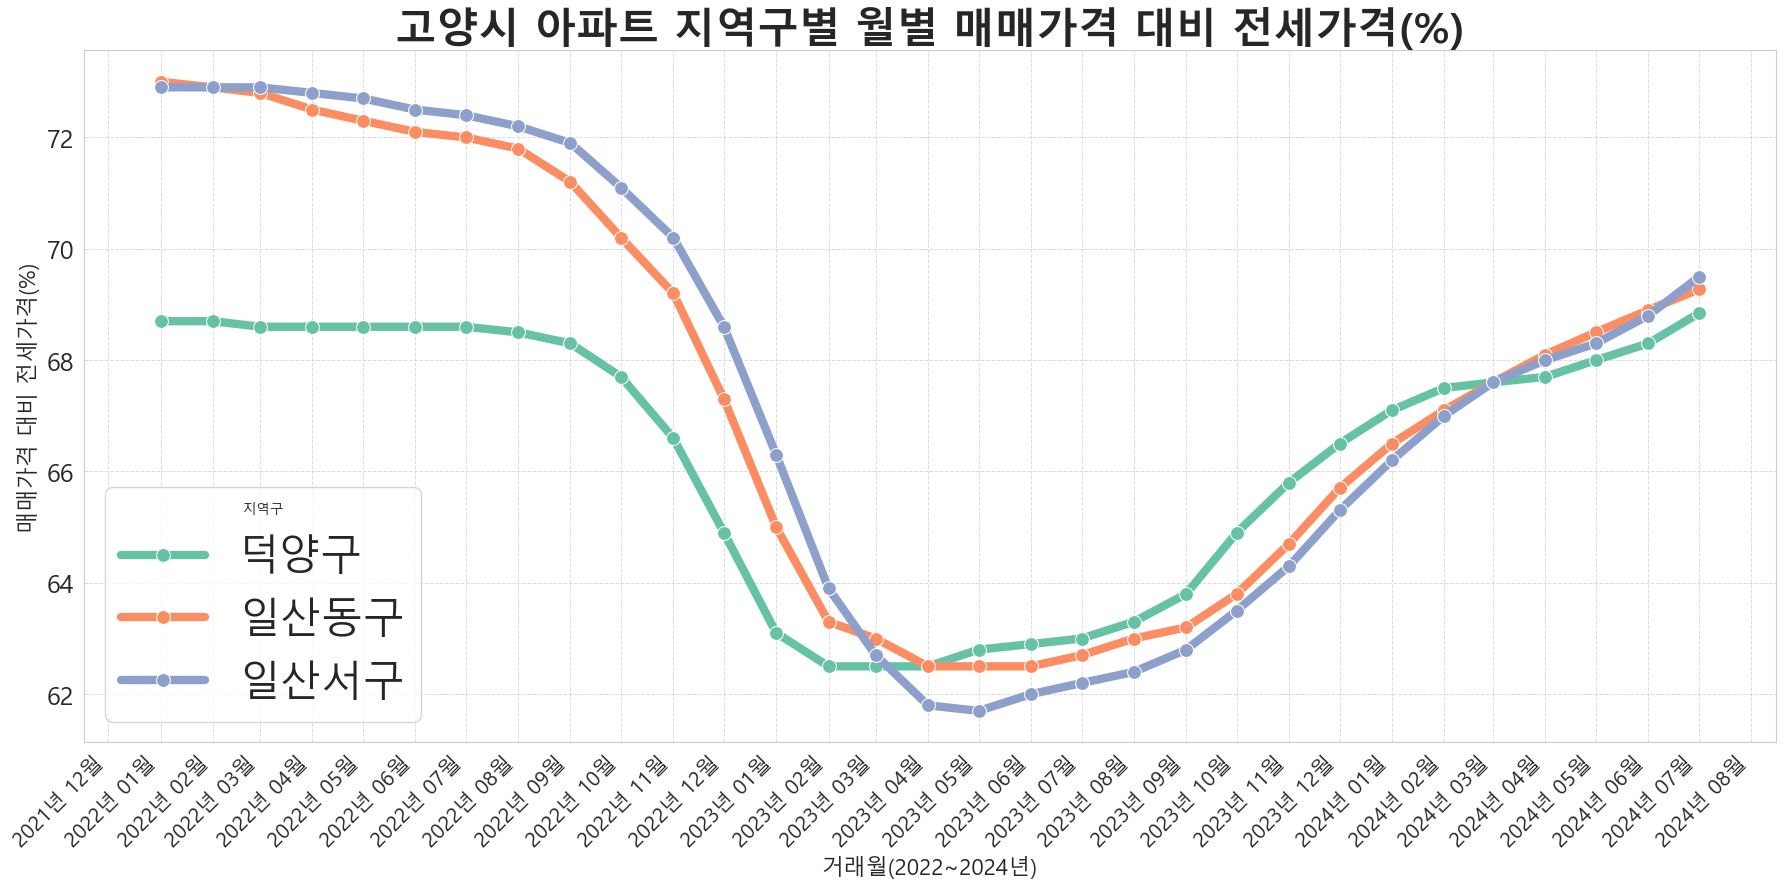

In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
items_monthly_indi_gu = goyang_apt_tx.copy()
items_monthly_indi_gu['WRTTIME_IDTFR_ID'] = pd.to_datetime(items_monthly_indi_gu['WRTTIME_IDTFR_ID'], format='%Y%m')

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=items_monthly_indi_gu, x='WRTTIME_IDTFR_ID', y='DTA_VAL', hue='CLS_NM', marker='o', markersize = 10, linewidth=6, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 아파트 지역구별 월별 매매가격 대비 전세가격(%)', fontsize=30, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('매매가격 대비 전세가격(%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.legend(title='지역구', fontsize=30)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


posx and posy should be finite values
posx and posy should be finite values


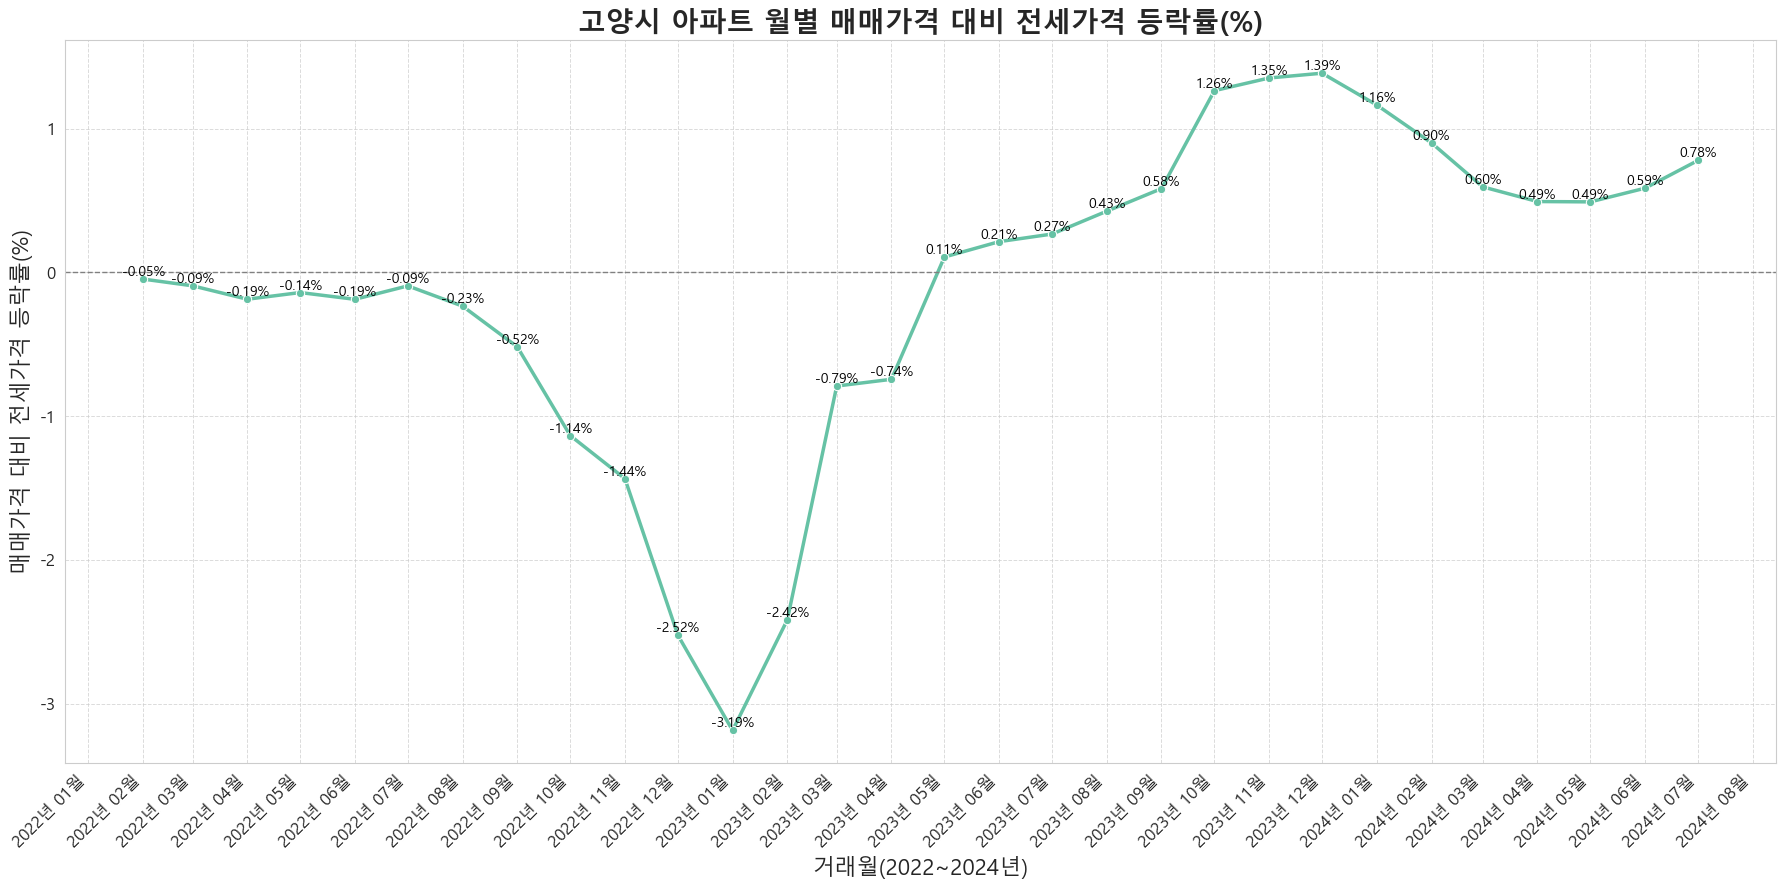

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_indi_change = goyang_apt_tx.copy()
goyang_monthly_indi_change['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_indi_change['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_indi_change = goyang_monthly_indi_change.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 전월 대비 등락률 계산
monthly_avg_indi_change = monthly_avg_indi_change.sort_values('WRTTIME_IDTFR_ID')
monthly_avg_indi_change['prev_valAmount'] = monthly_avg_indi_change['DTA_VAL'].shift(1)
monthly_avg_indi_change['change_rate'] = (monthly_avg_indi_change['DTA_VAL'] - monthly_avg_indi_change['prev_valAmount']) / monthly_avg_indi_change['prev_valAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi_change, x='WRTTIME_IDTFR_ID', y='change_rate', marker='o', linewidth=2.5)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 매매가격 대비 전세가격 등락률(%)', fontsize=20, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('매매가격 대비 전세가격 등락률(%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# 그래프 위에 등락률 수치 추가
for i in range(len(monthly_avg_indi_change)):
    plt.text(monthly_avg_indi_change['WRTTIME_IDTFR_ID'].iloc[i], monthly_avg_indi_change['change_rate'].iloc[i], 
             f'{monthly_avg_indi_change["change_rate"].iloc[i]:.2f}%', 
             ha='center', va='bottom', fontsize=10, color='black')


# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

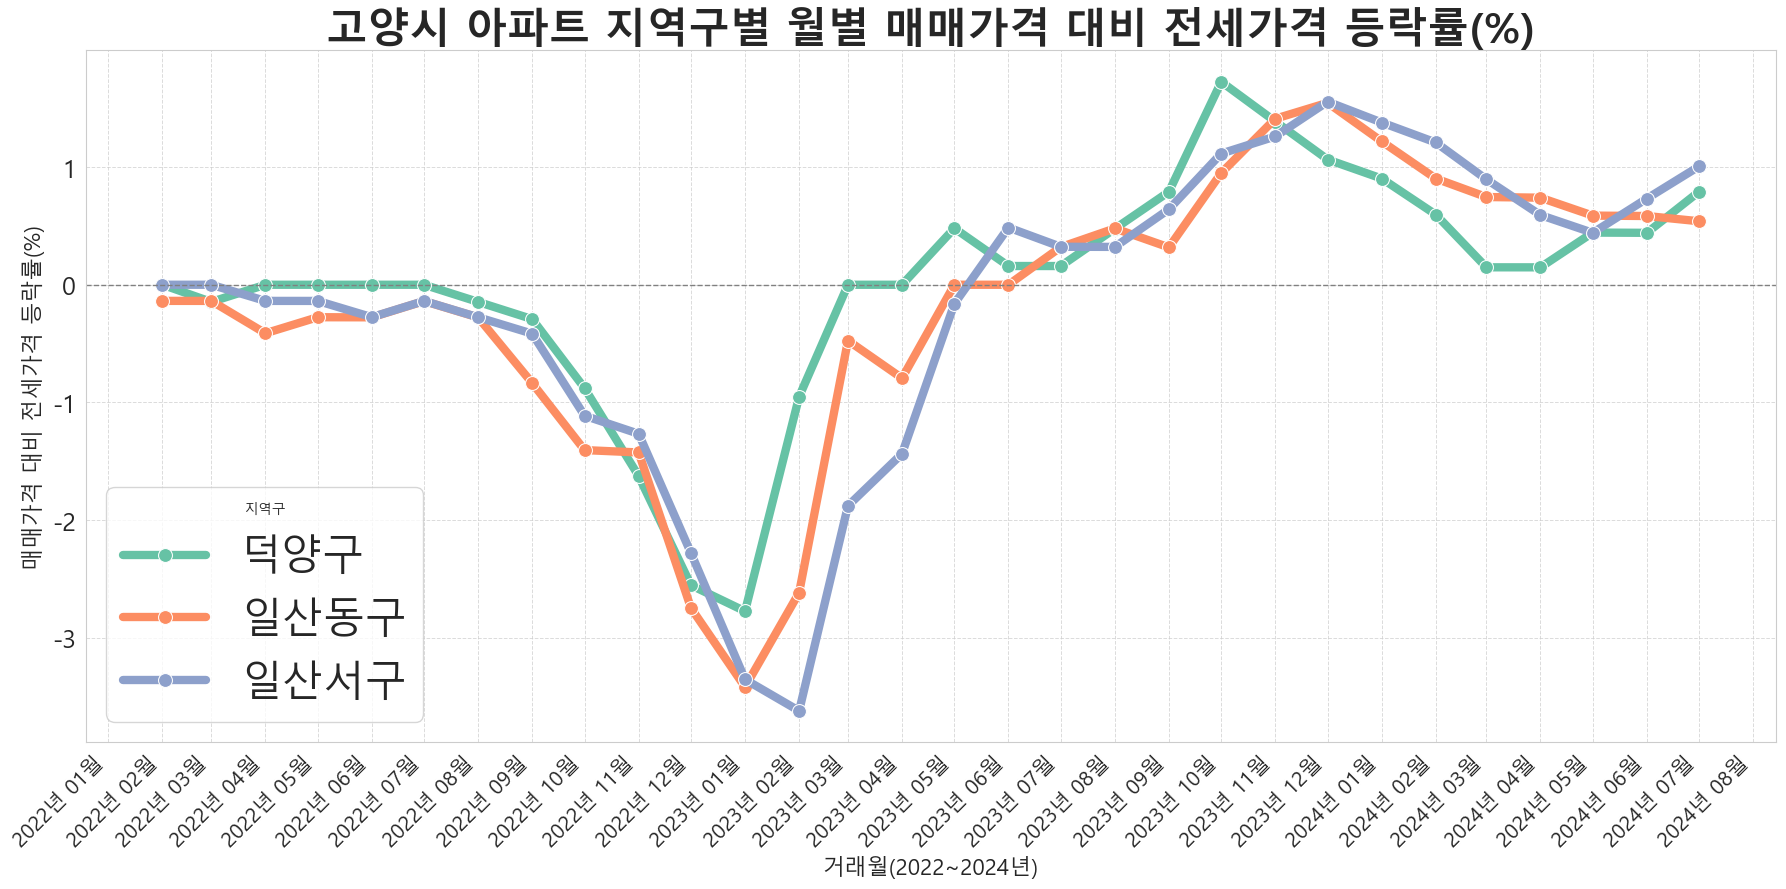

In [39]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
goyang_monthly_indi_change = goyang_apt_tx.copy()
goyang_monthly_indi_change['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_indi_change['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_indi_change_gu = goyang_monthly_indi_change.groupby(['WRTTIME_IDTFR_ID', 'CLS_NM'])['DTA_VAL'].mean().reset_index()

# 전월 대비 등락률 계산
monthly_avg_indi_change_gu = monthly_avg_indi_change_gu.sort_values(['CLS_NM', 'WRTTIME_IDTFR_ID'])
monthly_avg_indi_change_gu['prev_valAmount'] = monthly_avg_indi_change_gu.groupby('CLS_NM')['DTA_VAL'].shift(1)
monthly_avg_indi_change_gu['change_rate'] = (monthly_avg_indi_change_gu['DTA_VAL'] - monthly_avg_indi_change_gu['prev_valAmount']) / monthly_avg_indi_change_gu['prev_valAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi_change_gu, x='WRTTIME_IDTFR_ID', y='change_rate', hue='CLS_NM', marker='o', markersize = 10, linewidth=6, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 아파트 지역구별 월별 매매가격 대비 전세가격 등락률(%)', fontsize=30, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('매매가격 대비 전세가격 등락률(%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.legend(title='지역구', fontsize=30)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()
